In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
from sklearn import preprocessing


# info: this dataset contains LinkedIn Influencers daily posts details

# main goal is to analyze LinkedIn reach based on post content and related details.

In [2]:
df=pd.read_csv("file:///C:/Users/Vasanth/Downloads/influencers_data.csv")

C:\Users\Vasanth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Unnamed: 0,name,headline,location,followers,connections,about,time_spent,content,content_links,media_type,media_url,num_hashtags,hashtag_followers,hashtags,reactions,comments,views,votes
0,0,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 day ago,Robert Lerman writes that achieving a healthy...,[['https://www.linkedin.com/in/ACoAAACy1HkBviR...,article,['https://www.urban.org/urban-wire/its-time-mo...,4,0,"[['#workbasedlearning', 'https://www.linkedin....",12,1,NaN,NaN
1,1,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 week ago,"National disability advocate Sara Hart Weir, ...",[['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...,NaN,[],0,0,[],11,0,NaN,NaN
2,2,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,NaN,[],NaN,[],0,0,[],15,0,NaN,NaN
3,3,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,Exploring in this months Talent Management & H...,[['https://www.linkedin.com/in/ACoAAAADlGIBLfn...,article,['https://www.tlnt.com/apprenticeships-that-br...,4,0,"[['#careerplanning', 'https://www.linkedin.com...",44,0,NaN,NaN
4,4,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,I count myself fortunate to have spent time wi...,[['https://www.linkedin.com/in/ACoAABhNxDUB9IX...,article,['https://gritdaily.com/the-legacy-of-verified...,3,0,"[['#verifiedresumes', 'https://www.linkedin.co...",22,2,NaN,NaN


#  here the target variable is "followers" hence it is regression model.

In [4]:
df.shape

(34012, 19)

In [5]:
df["name"].count()

34012

In [6]:
df['name'].unique()

array(['Nicholas Wyman', 'Jonathan Wolfer', 'Karen Gross',
       'Kaia Niambi Shivers Ph.D.', "Daniel Cohen-I'm Flyering",
       'Natalie Riso', 'Dale Corley', 'James Calder', 'Yasi Baiani',
       'Julie Kliger', 'Stephanie C. O.', 'Michelle de Haaff',
       'Bertalan Meskó, MD, PhD', 'Michelle Chaffee', 'Beth Seidenberg',
       'Russell Benaroya', 'Richard Branson', 'Mohamed El-Erian',
       'James Altucher', 'Bernard Marr', 'Ian Bremmer', 'Sramana Mitra',
       'Lynne Everatt', 'Justin Bariso', 'Carson Tate', 'Gary Frisch',
       'James Bareham', 'Tai T.', 'Glenn Leibowitz', 'Marianne Griebler',
       'Tom Goodwin', 'Katie Martell', 'Shama Hyder',
       'Barry W. Enderwick', 'Steve Blakeman', 'Gillian Zoe Segal',
       'Tom Foremski', 'Kiara Imani Williams, Esq.', 'Kellye Whitney',
       'Simon Owens', 'Rachel Jones', 'Vikram Mansharamani',
       '🏉 Pascal Bouvier', 'Geoffrey Garrett', 'Ben Casselman',
       'Tamal Bandyopadhyay', 'Karen Webster', 'Jody Padar',
       '

In [7]:
df['name'].unique().shape

(69,)

In [8]:
df['time_spent'].unique()

array(['1 day ago', '1 week ago', '2 months ago', '3 months ago',
       '4 months ago', '5 months ago', '6 months ago', '7 months ago',
       '8 months ago', '9 months ago', '10 months ago', '11 months ago',
       '1 year ago', '2 years ago', '3 years ago', '4 years ago',
       '5 years ago', '6 years ago', '3 days ago', '2 weeks ago',
       '3 weeks ago', '1 month ago', '4 days ago', '7 years ago',
       '1 hour ago', '3 hours ago', '5 hours ago', '2 days ago',
       '6 days ago', '15 hours ago', '19 hours ago', '20 hours ago',
       '7 hours ago', '8 hours ago', '22 hours ago', '5 days ago',
       '4 hours ago', '14 hours ago', '2 hours ago', '6 hours ago',
       '10 hours ago', '13 hours ago', '23 hours ago', '18 hours ago',
       '21 hours ago', '9 hours ago', nan, '12 hours ago', '17 hours ago'],
      dtype=object)

In [9]:
df.describe()

,Unnamed: 0,followers,num_hashtags,hashtag_followers,reactions,comments,views
count,34012.000000,3.397000e+04,34012.000000,34012.0,34012.000000,34012.000000,0.0
mean,17005.500000,1.125922e+06,2.099788,0.0,472.956486,26.977273,NaN
std,9818.563014,3.057750e+06,3.517457,0.0,4163.929944,216.364372,NaN
min,0.000000,1.710000e+02,0.000000,0.0,0.000000,0.000000,NaN
25%,8502.750000,9.914800e+04,0.000000,0.0,7.000000,0.000000,NaN
50%,17005.500000,4.082540e+05,0.000000,0.0,36.000000,2.000000,NaN
75%,25508.250000,7.193340e+05,3.000000,0.0,143.000000,14.000000,NaN
max,34011.000000,1.828935e+07,48.000000,0.0,391498.000000,32907.000000,NaN


In [10]:
df.isnull().sum()

Unnamed: 0               0
name                     0
headline                 0
location              2272
followers               42
connections           8299
about                    0
time_spent               1
content               2016
content_links            0
media_type            7233
media_url                0
num_hashtags             0
hashtag_followers        0
hashtags                 0
reactions                0
comments                 0
views                34012
votes                33926
dtype: int64

In [11]:
df = df.drop(columns = ['views', 'votes', 'media_type', 'content', 'connections', 'location','content_links', 'media_url','about'])

In [12]:
df.head()

,Unnamed: 0,name,headline,followers,time_spent,num_hashtags,hashtag_followers,hashtags,reactions,comments
0,0,Nicholas Wyman,CEO IWSI Group,6484.0,1 day ago,4,0,"[['#workbasedlearning', 'https://www.linkedin....",12,1
1,1,Nicholas Wyman,CEO IWSI Group,6484.0,1 week ago,0,0,[],11,0
2,2,Nicholas Wyman,CEO IWSI Group,6484.0,2 months ago,0,0,[],15,0
3,3,Nicholas Wyman,CEO IWSI Group,6484.0,2 months ago,4,0,"[['#careerplanning', 'https://www.linkedin.com...",44,0
4,4,Nicholas Wyman,CEO IWSI Group,6484.0,2 months ago,3,0,"[['#verifiedresumes', 'https://www.linkedin.co...",22,2


In [13]:
df['followers']=df['followers'].replace(to_replace=0, value=np.nan)
df['followers']=df['followers'].astype(float)
mean=df['followers'].mean()
df['followers'].replace(np.nan,mean,inplace=True)

In [14]:
cov= df.corr()

In [15]:
cov["followers"].sort_values(ascending=True)

Unnamed: 0          -0.223846
num_hashtags        -0.061855
comments             0.195125
reactions            0.241809
followers            1.000000
hashtag_followers         NaN
Name: followers, dtype: float64

# data visualization

C:\Users\Vasanth\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Vasanth\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127945 missing from current font.
  font.set_text(s, 0, flags=flags)


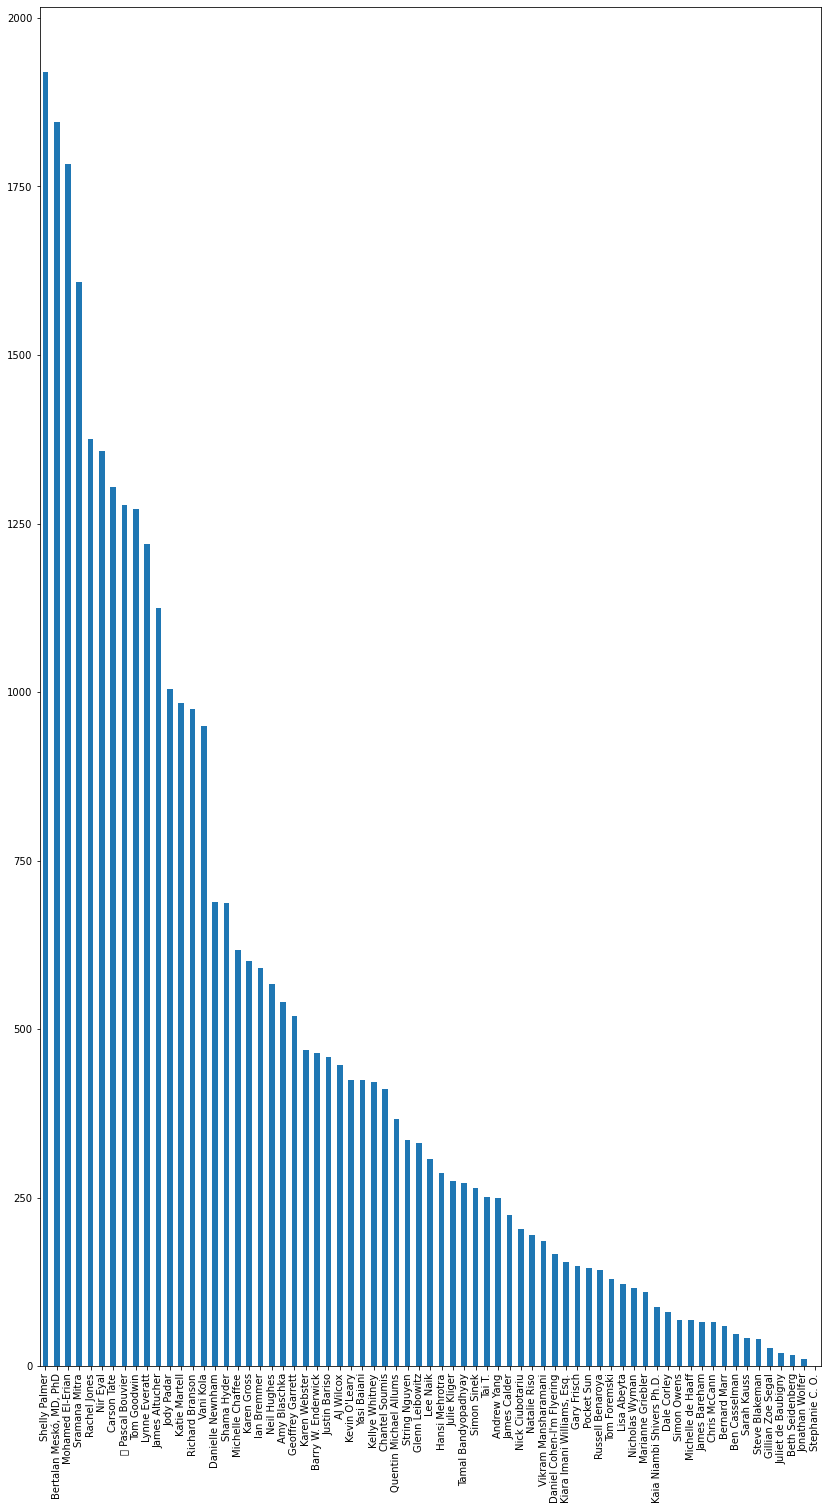

In [16]:
df['name'].value_counts().plot(kind='bar')
plt.gcf().set_size_inches(14, 25)

### from the above plot we can see all the influencers and their highest count of followers. here we can see mr. shelly palmer has highest reach. and stephaine has lowest when compared to others. 

### here i am analyzing shelly palmer data

In [17]:
df_first = df[(df['name']=='Shelly Palmer')]

In [18]:
df_first['time_spent'].unique()

array(['14 hours ago', '15 hours ago', '17 hours ago', '18 hours ago',
       '19 hours ago', '1 day ago', '1 week ago', '2 days ago',
       '3 days ago', '4 days ago', '2 weeks ago', '3 weeks ago',
       '1 month ago', '2 months ago', '3 months ago', '4 months ago',
       '5 months ago', '6 months ago', '7 months ago', '8 months ago',
       '9 months ago', '10 months ago', '11 months ago', '1 year ago'],
      dtype=object)

<AxesSubplot:xlabel='followers', ylabel='Count'>

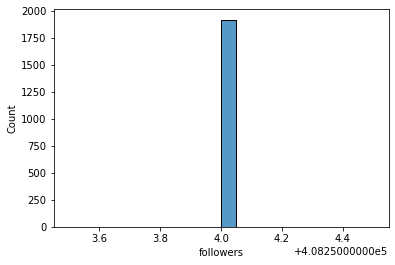

In [19]:
sns.histplot(df_first['followers'],kde=False,bins=20)

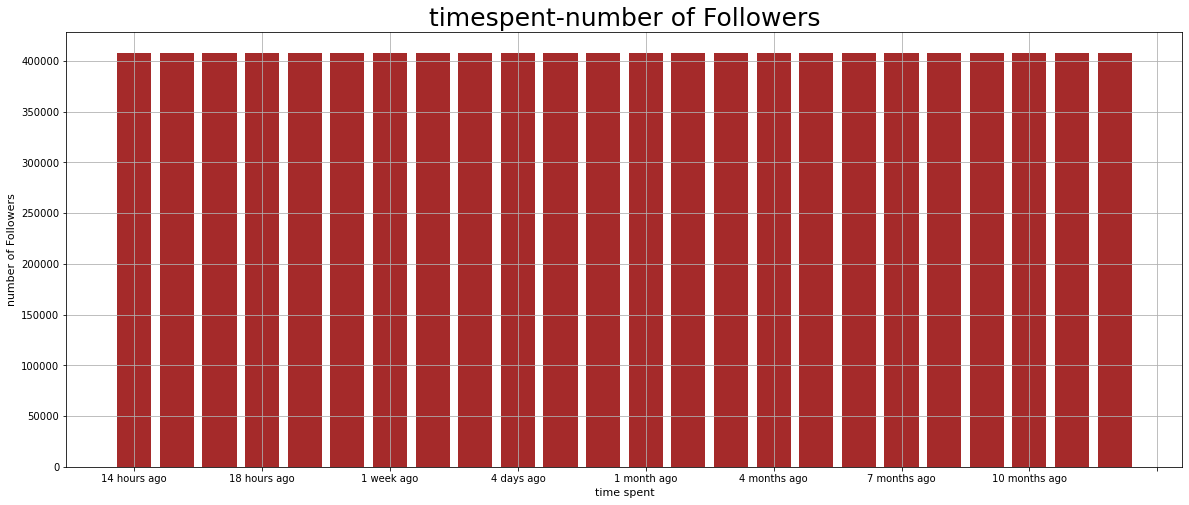

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['followers'], color='brown')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('number of Followers', fontsize='11')
plt.title('timespent-number of Followers', fontsize='25')
plt.grid()
plt.show()

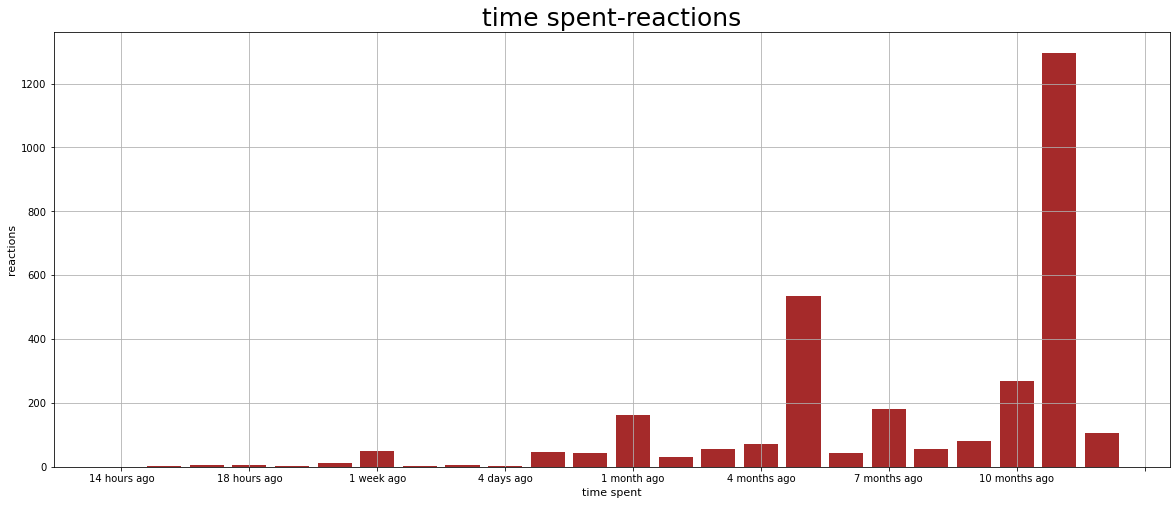

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['reactions'], color='brown')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('reactions', fontsize='11')
plt.title('time spent-reactions', fontsize='25')
plt.grid()
plt.show()

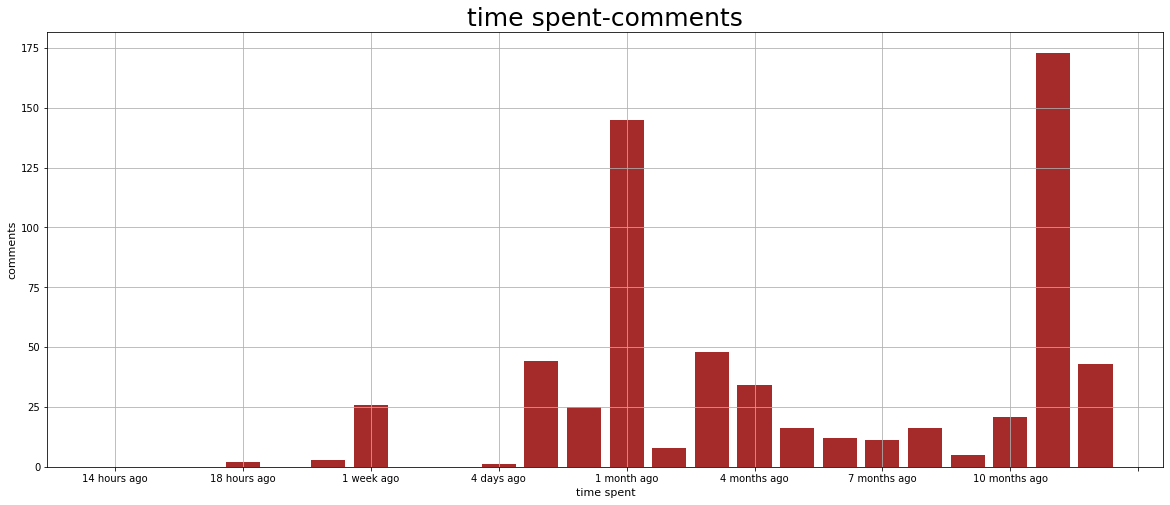

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['comments'], color='brown')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('comments', fontsize='11')
plt.title('time spent-comments', fontsize='25')
plt.grid()
plt.show()

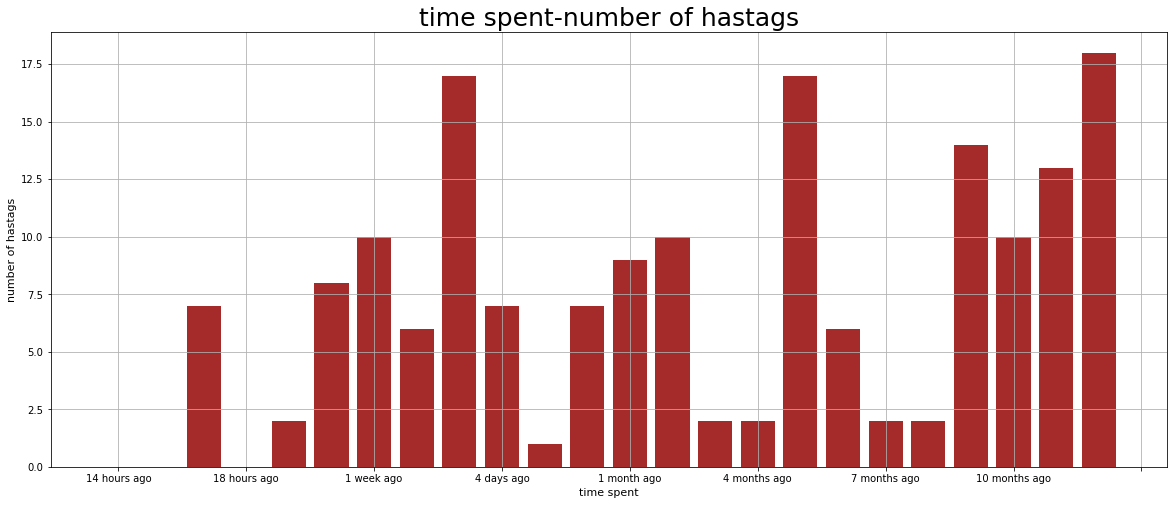

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['num_hashtags'], color='brown')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('number of hastags', fontsize='11')
plt.title('time spent-number of hastags', fontsize='25')
plt.grid()
plt.show()

### here i am analyzing the influencer having lowest  reach.

In [24]:
df_first = df[(df['name']=='Jonathan Wolfer')]

In [25]:
df_first['time_spent'].unique()

array(['3 months ago', '1 year ago', '2 years ago', '3 years ago',
       '4 years ago', '5 years ago', '6 years ago'], dtype=object)

<AxesSubplot:xlabel='followers', ylabel='Count'>

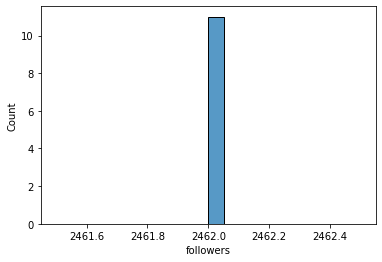

In [26]:
sns.histplot(df_first['followers'],kde=False,bins=20)

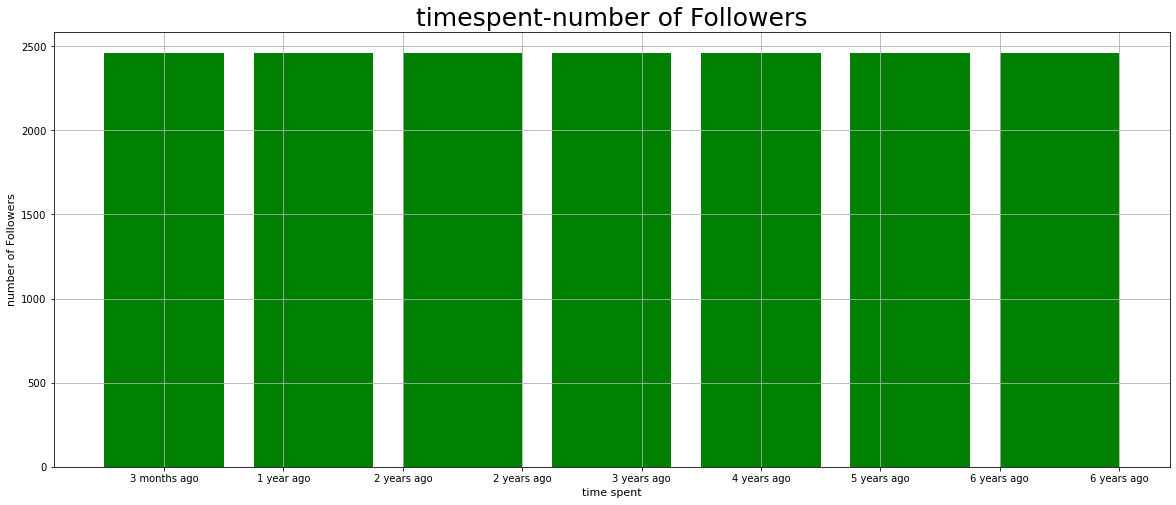

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['followers'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('number of Followers', fontsize='11')
plt.title('timespent-number of Followers', fontsize='25')
plt.grid()
plt.show()

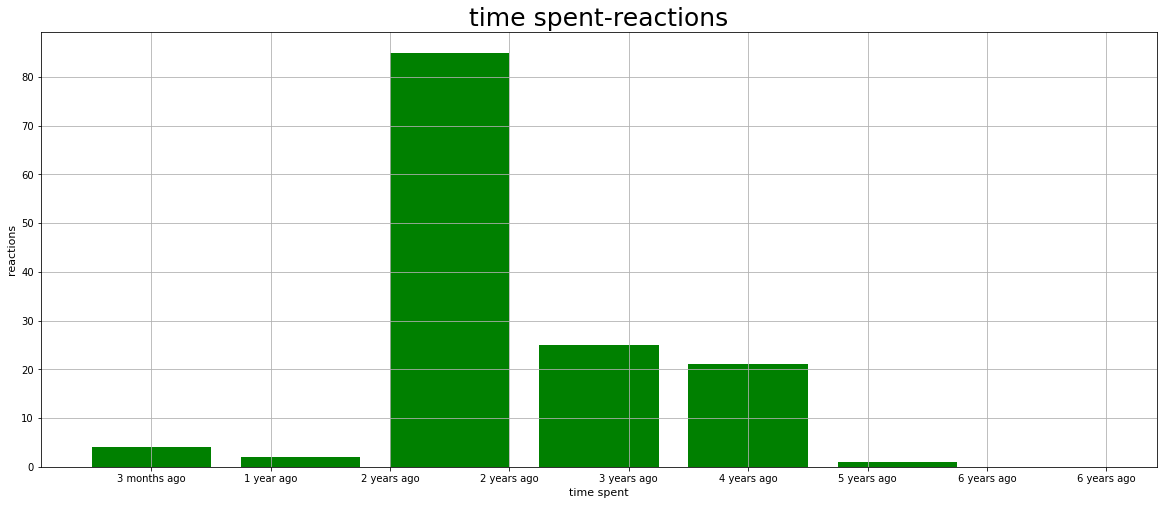

In [28]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['reactions'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('reactions', fontsize='11')
plt.title('time spent-reactions', fontsize='25')
plt.grid()
plt.show()

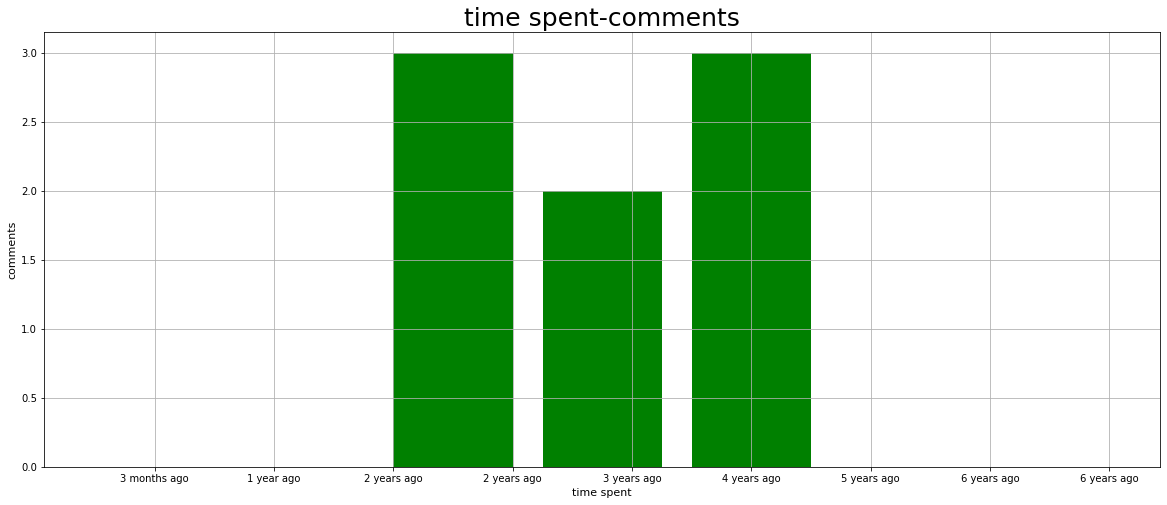

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['comments'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('comments', fontsize='11')
plt.title('time spent-comments', fontsize='25')
plt.grid()
plt.show()

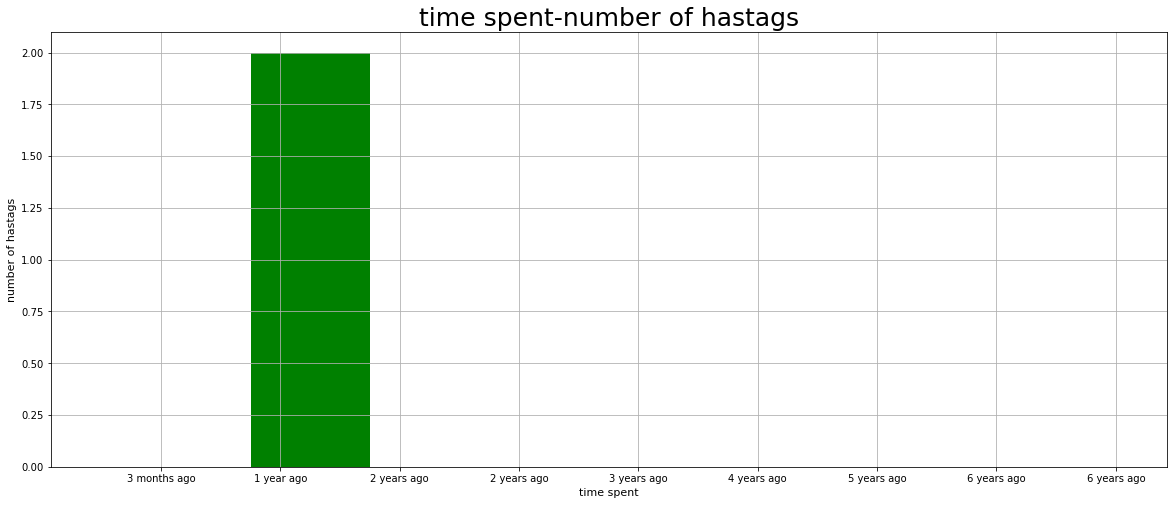

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['num_hashtags'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('number of hastags', fontsize='11')
plt.title('time spent-number of hastags', fontsize='25')
plt.grid()
plt.show()

### as we can see he has'nt uploaded anything in these 5 years and hence he has lowerst reach.

###  here i am analyzing the  influencer how has 2nd lowest  reach

In [31]:
df_first = df[(df['name']=='Stephanie C. O')]

<AxesSubplot:>

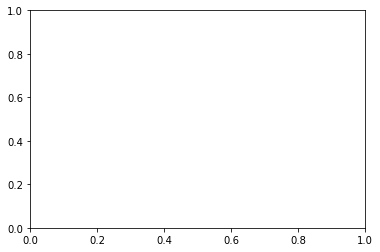

In [32]:
sns.histplot(df_first['followers'],kde=False,bins=20)

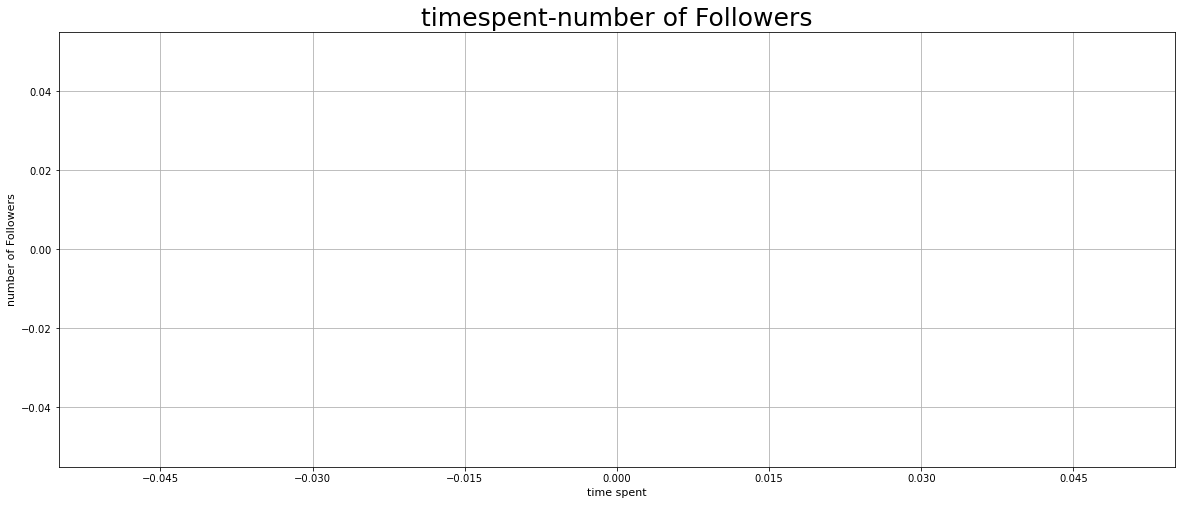

In [33]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['followers'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('number of Followers', fontsize='11')
plt.title('timespent-number of Followers', fontsize='25')
plt.grid()
plt.show()

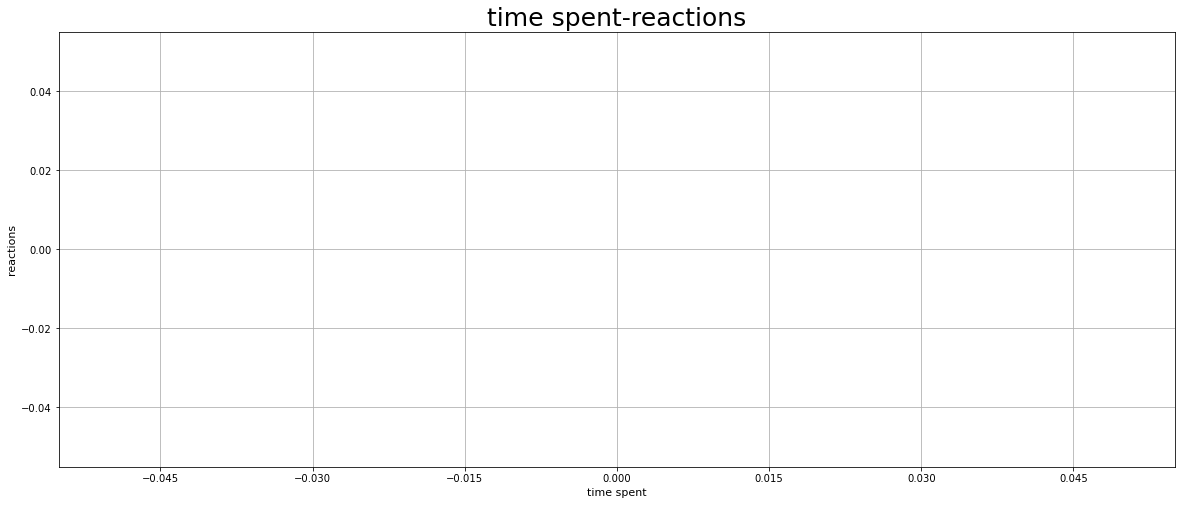

In [34]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['reactions'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('reactions', fontsize='11')
plt.title('time spent-reactions', fontsize='25')
plt.grid()
plt.show()

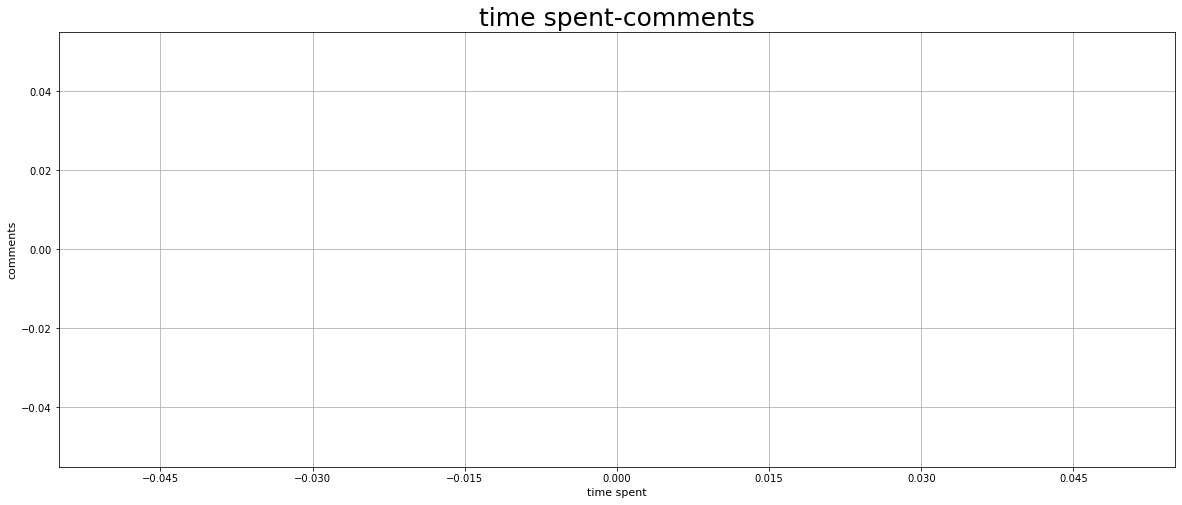

In [35]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['comments'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('comments', fontsize='11')
plt.title('time spent-comments', fontsize='25')
plt.grid()
plt.show()

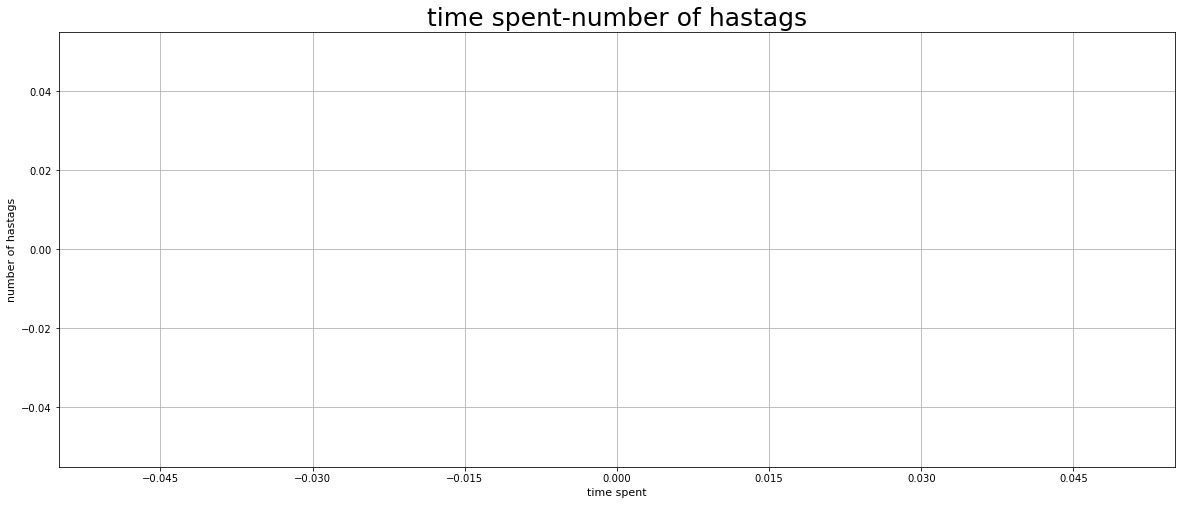

In [36]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['num_hashtags'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('time spent', fontsize='11')
ax.set_ylabel('number of hastags', fontsize='11')
plt.title('time spent-number of hastags', fontsize='25')
plt.grid()
plt.show()

### hence depends on how much time he has spent on posting valuable information the followers increasers.

In [37]:
df.rename( columns={"Unnamed: 0":'number' } ,inplace=True)

In [38]:
df = df.drop(columns = [ 'hashtags', 'headline', 'name','time_spent'])

In [39]:
df.head()

,number,followers,num_hashtags,hashtag_followers,reactions,comments
0,0,6484.0,4,0,12,1
1,1,6484.0,0,0,11,0
2,2,6484.0,0,0,15,0
3,3,6484.0,4,0,44,0
4,4,6484.0,3,0,22,2


### modelling data

In [40]:
x=df.drop(['followers',],axis=1)
y=df[['followers']]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [42]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
reg.score(x_train,y_train)

0.10670057321892745

In [44]:
reg.score(x_test,y_test)

0.13356849778276847

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
dtr= DecisionTreeRegressor()

In [47]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
dtr.score(x_train,y_train)

1.0

In [49]:
dtr.score(x_test,y_test)

0.9968285071215987

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr= RandomForestRegressor(random_state=1)

In [52]:
rfr.fit(x_train,y_train)

C:\Users\Vasanth\AppData\Local\Temp/ipykernel_5084/1947426121.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestRegressor(random_state=1)

In [53]:
rfr.score(x_train,y_train)

0.9994934954182777

In [54]:
rfr.score(x_test,y_test)

0.9969268869175981

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [56]:
KNR= KNeighborsRegressor(n_neighbors=8, p=3,leaf_size=4)

In [57]:
KNR.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=4, n_neighbors=8, p=3)

In [58]:
KNR.score(x_train,y_train)

0.9808342032810294

In [59]:
KNR.score(x_test,y_test)

0.9760954810780003

### normalization

In [60]:

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [61]:

x=df.drop(['followers',],axis=1)
y=df[['followers']]

In [62]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(x,y,test_size=0.3,random_state=1)

In [63]:
b = DecisionTreeRegressor()

In [64]:
b.fit(x_train_norm,y_train)

DecisionTreeRegressor()

In [65]:
b.score(x_train_norm,y_train)

1.0

In [66]:
b.score(x_test_norm,y_test)

0.9966779748530125

### standardization

In [67]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

# numerical features
num_cols = ['number','num_hashtags','hashtag_followers','reactions','comments']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train_stand[[i]])
    
    # transform the training data column
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    
    # transform the testing data column
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [68]:
rfr.fit(x_train_stand,y_train)

C:\Users\Vasanth\AppData\Local\Temp/ipykernel_5084/932141593.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train_stand,y_train)


RandomForestRegressor(random_state=1)

In [69]:
rfr.score(x_train_stand,y_train)

0.999493749659269

In [70]:
rfr.score(x_test_stand,y_test)

0.9969360162319794